# 4.3 - Evaluación

### Silhoutte Score

$$S=\frac{b(v)-a(v)}{max(a,b)}$$

donde:

+ v:= vector de datos
+ a(v):=distancia media desde v al resto de vectores del mismo cluster
+ b(v):=distancia media desde v a los vectores del cluster más cercano



S pertenece al intervalo [-1,1], de tal manera que:

+ S=1  => buena clusterizacion
+ S=0  => overlapping
+ S=-1 => mala clusterizacion

In [1]:
from sklearn import cluster, datasets

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


import numpy as np

In [2]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)

In [3]:
X=StandardScaler().fit_transform(X)

In [4]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [5]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

**plots**

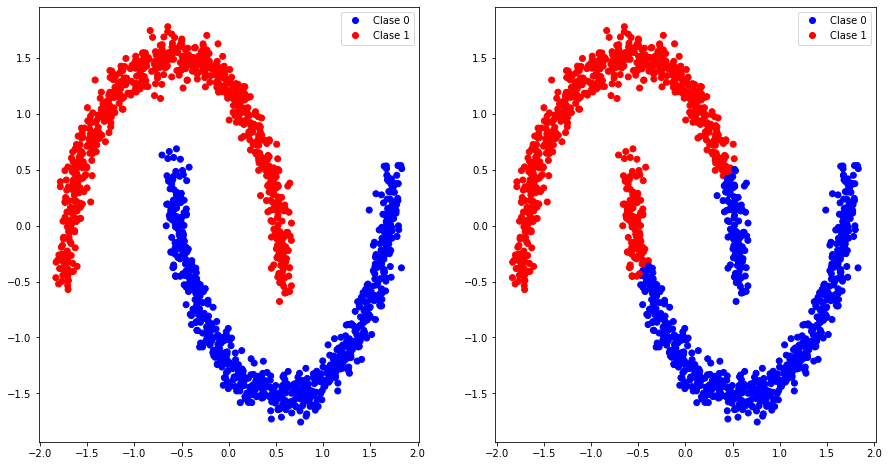

In [6]:
fig,ax = plt.subplots(1, 2, figsize=(15, 8))

colors=np.array(['blue', 'red'])

legend_e=[Line2D([0],[0], color=c, marker='o', linestyle='',
                 label='Clase {}'.format(i))  for i,c in enumerate(colors)]

ax[0].scatter(X[:,0], X[:, 1], color=colors[y1_pred])
ax[0].legend(handles=legend_e, loc='upper right')

ax[1].scatter(X[:,0], X[:, 1], color=colors[y2_pred])
ax[1].legend(handles=legend_e, loc='upper right');

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
print ('Modelo 1 - Hierarchical : Silhouette Score:{}'.format(silhouette_score(X, y1_pred)))
print ('Modelo 2 - KMeans       : Silhouette Score:{}'.format(silhouette_score(X, y2_pred)))

Modelo 1 - Hierarchical : Silhouette Score:0.39120688379466645
Modelo 2 - KMeans       : Silhouette Score:0.49757028768852374


# Elbow

**nº óptimo de clusters**


![elbow](images/elbow.png)

$$WSS=Inercia=\sum_{i=0}^{n} min(|x_i - \bar{x}|^{2})$$

In [9]:
X,y=datasets.make_blobs(n_features=3, centers=2)

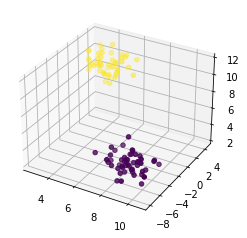

In [10]:
fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y);

In [11]:
n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters=k).fit(X).inertia_) for k in range(1, 10)])

In [59]:
[cluster.KMeans(n_clusters=k).fit(X).inertia_ for k in range(1, 10)]

[17551.33061011057,
 10307.865606943584,
 5221.500051328407,
 2713.2285044771347,
 759.0040011930195,
 729.3249611986919,
 697.6621381816751,
 663.390941764464,
 648.692875419727]

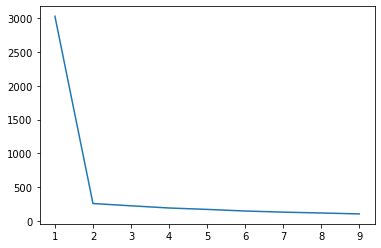

In [12]:
fig=plt.figure()

ax=fig.add_subplot()
ax.plot(n_clusters, inercia);

In [13]:
from yellowbrick.cluster import KElbowVisualizer

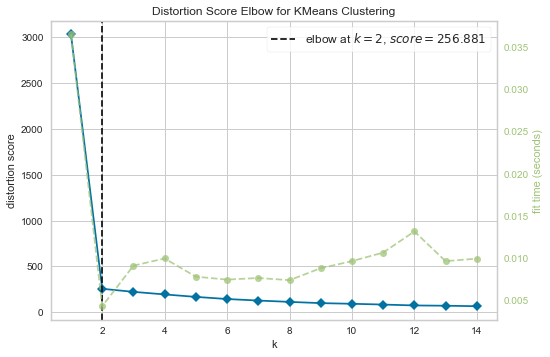

In [14]:
modelo=cluster.KMeans()

visual=KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();

In [15]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [16]:
inercias=[]

for i in range(1, 10):
    kmeans=cluster.KMeans(n_clusters=i).fit(X)
    
    inercias.append(kmeans.inertia_)

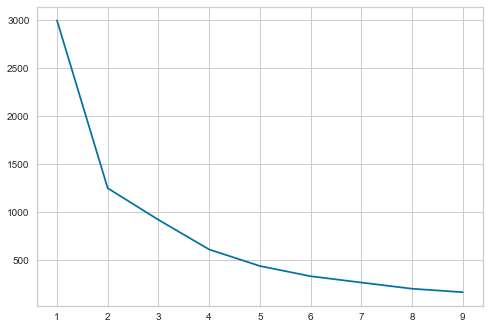

In [17]:
plt.plot(range(1, 10), inercias);

# Rand Score

$$R=\frac{(a+b)}{(a+b+c+d)}$$


pertece al intervalo [0,1]

Sea  S={ s_1, $\ldots{}$, s_n }; X={ x_1, $\ldots{}$, x_n } partición de S e Y={ y_1, $\ldots{}$, y_n } partición de S, entonces:

+ a:=nº de pares de elementos en S que están en el mismo subconjunto de X e Y
+ b:=nº de pares de elementos en S que están en diferentes subconjuntos de X e Y
+ c:=nº de pares de elementos en S que están en el mismo subconjunto de X y en diferente subconjunto de Y
+ d:=nº de pares de elementos en S que están en diferente subconjunto de X y en el mismo subconjunto de Y



Intuitivamente, _a+b_ es la correspondencia entre X e Y, c+d es la discordancia.


https://es.wikipedia.org/wiki/Partici%C3%B3n_de_un_conjunto

http://i3campus.co/CONTENIDOS/wikipedia/content/a/partici%25c3%25b3n_(matem%25c3%25a1tica).html#:~:text=En%20matem%C3%A1ticas%2C%20una%20partici%C3%B3n%20de,en%20subconjuntos%20disjuntos%20no%20vac%C3%ADos.

**Adjusted Rand Score**


$$AR=\frac{R - ExpectedR}{max(R) - ExpectedR}$$

In [18]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [19]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [20]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

In [21]:
from sklearn.metrics import adjusted_rand_score as ars

In [22]:
ars(y, y1_pred)  # hierarchical

1.0

In [23]:
ars(y, y2_pred)  # KMeans

0.4915292402122926

# Visualización de Clusters

In [24]:
X, _= datasets.make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

In [25]:
kmeans=cluster.KMeans(n_clusters=4).fit(X)

In [26]:
y_pred=kmeans.predict(X)

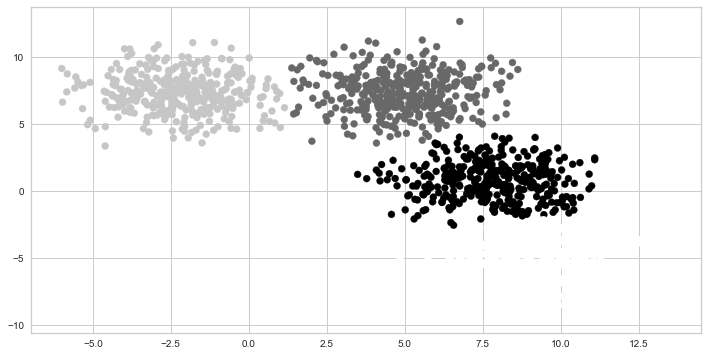

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred);

In [28]:
centers=kmeans.cluster_centers_

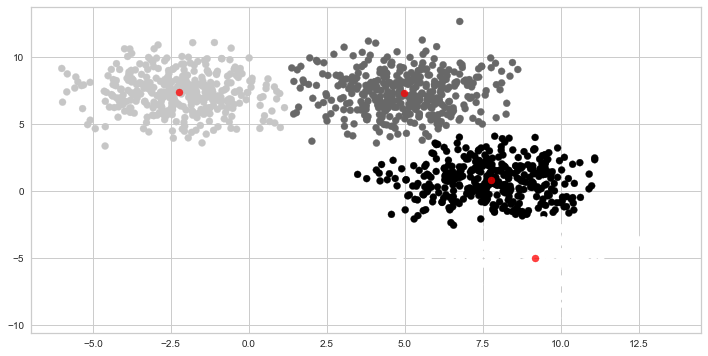

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.75);

**otro plot en 3D**

In [30]:
from scipy.spatial.transform import Rotation as R

In [31]:
X, _= datasets.make_blobs(n_samples=1500, centers=3, cluster_std=1.)

X=np.c_[X, 0.5*np.random.randn(X.shape[0], 1)]

rot=R.from_euler('y', 45, degrees=True)

X=rot.apply(X)

2022-05-05 11:11:12,259 [48112] WARNING  py.warnings:109: [JupyterRequire] /var/folders/fv/zc4lh9sn7bnf55fy6jhl0k900000gn/T/ipykernel_48112/1850276423.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')



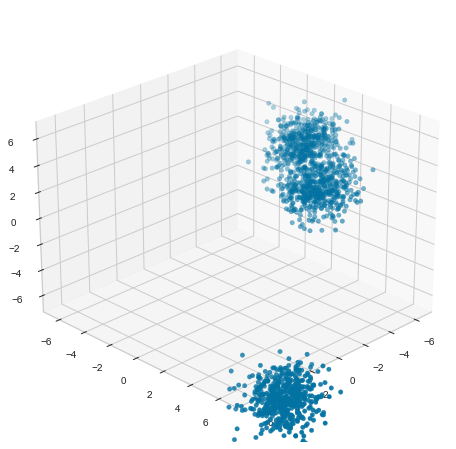

In [32]:
fig=plt.figure(figsize=(12, 8))
ax=fig.gca(projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=25, azim=45)
plt.show();

**reduccion de dimensiones-viz**

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca=PCA().fit(X)

pca_x=pca.transform(X)

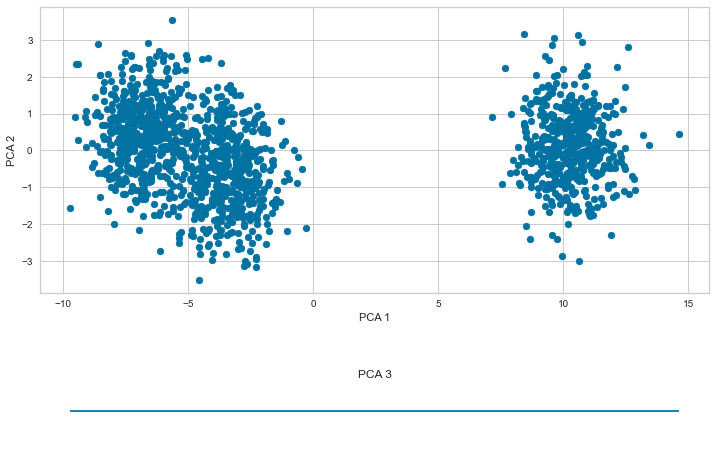

In [35]:
fig=plt.figure(figsize=(12, 8))

ax=[plt.subplot2grid((6, 1), (0, 0), rowspan=4),
    plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_x[:,0], pca_x[:,1])
ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)

y=np.ones(X.shape[0])

ax[1].plot(pca_x[:,2], y, '|', ms='20')
ax[1].axis('off')

plt.show();

**t-SNE**

In [36]:
from sklearn.manifold import TSNE

In [37]:
X,y = datasets.load_iris(return_X_y=True)

2022-05-05 11:11:15,599 [48112] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/miniforge3/envs/clase/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(

2022-05-05 11:11:15,599 [48112] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/miniforge3/envs/clase/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(

2022-05-05 11:11:15,817 [48112] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/miniforge3/envs/clase/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(

2022-05-05 11:11:15,818 [48112] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/miniforge3/envs/clase/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py

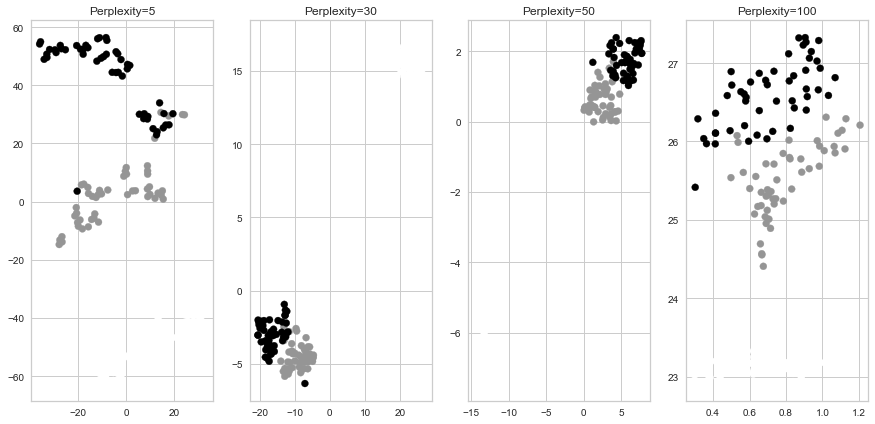

In [38]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();

**UMAP - MNIST**

In [39]:
digitos=datasets.load_digits()
digitos.data.shape

(1797, 64)

In [40]:
digitos.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [41]:
len(digitos.data[0])

64

In [42]:
digitos.target[0]

0

In [43]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

from umap import UMAP

In [44]:
def get_umap(data, n):
    
    umap=UMAP(n_components=n)
    emb=umap.fit_transform(data)
    
    return pd.DataFrame(emb, columns=[f'emb_{i+1}' for i in range(n)])

In [45]:
umap_df=get_umap(digitos.data, 2)

umap_df.head()

,emb_1,emb_2
0,15.787701,6.661578
1,-6.347581,9.914485
2,-3.481333,10.887911
3,0.058216,8.206985
4,2.491367,18.633127


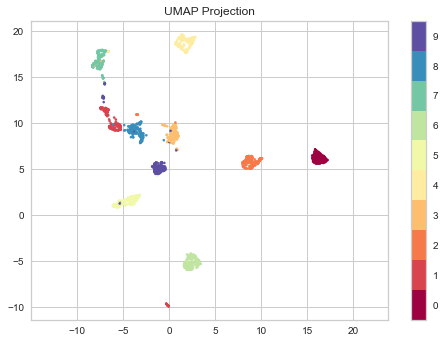

In [46]:
plt.scatter(umap_df.emb_1, umap_df.emb_2, c=digitos.target, cmap='Spectral', s=5)

plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');

**umap supervisado**

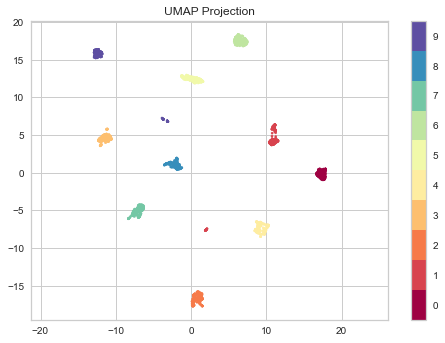

In [47]:
emb=UMAP().fit_transform(digitos.data, y=digitos.target)  # y=target es para supervisado

umap_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])


plt.scatter(umap_df.emb_1, umap_df.emb_2, c=digitos.target, cmap='Spectral', s=5)

plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');


**umap en moons y en blobs**

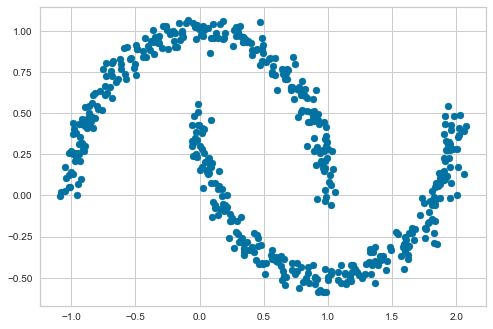

In [48]:
X,y=datasets.make_moons(n_samples=500, shuffle=True, noise=.05)

plt.scatter(X[:,0], X[:,1]);

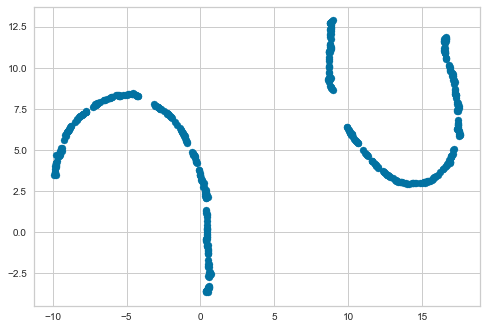

In [49]:
umap_df=get_umap(X, 2)

plt.scatter(umap_df.emb_1, umap_df.emb_2);

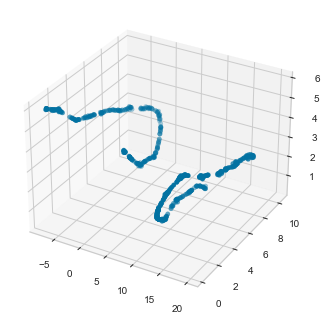

In [50]:
umap_df=get_umap(X, 3)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3);

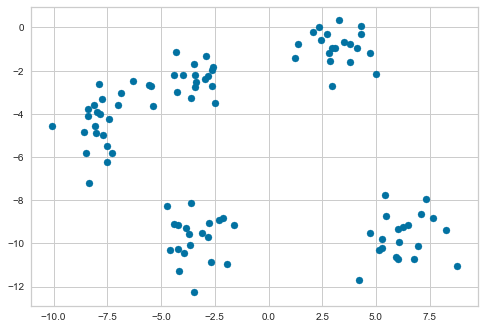

In [51]:
# blobs

X,y=datasets.make_blobs(n_features=8, centers=5)

plt.scatter(X[:,0], X[:,1]);

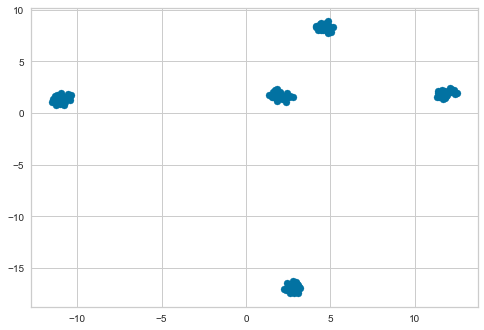

In [52]:
umap_df=get_umap(X, 2)

plt.scatter(umap_df.emb_1, umap_df.emb_2);

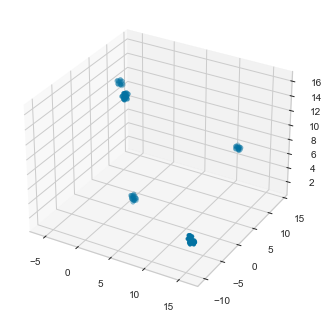

In [53]:
umap_df=get_umap(X, 3)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3);

In [54]:
from hdbscan import HDBSCAN

In [55]:
hdbscan=HDBSCAN()

pred=hdbscan.fit_predict(umap_df)

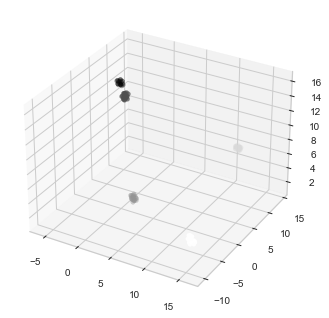

In [56]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3, c=pred);

In [57]:
ars(y, pred)  # adjusted rand score

1.0

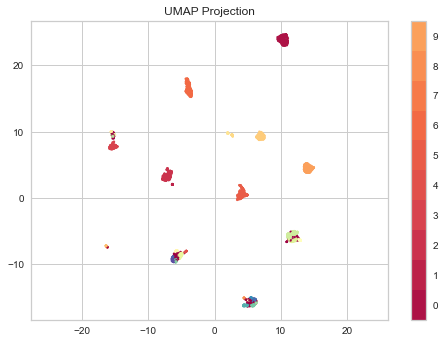

In [61]:
emb=UMAP().fit_transform(digitos.data, y=digitos.target)  # y=target es para supervisado

umap_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])

pred=hdbscan.fit_predict(umap_df)

plt.scatter(umap_df.emb_1, umap_df.emb_2, c=pred, cmap='Spectral', s=5)

plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');